In [23]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
import pandas as pd
import seaborn as sns
import src.normFunc as nf
import src.cg as CG
import scipy.sparse as sparse
from src.utility import make_plot, generate_starting_point
import matplotlib.pyplot as plt

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
PATH = "./matrix/"

In [26]:
M1 = np.loadtxt(PATH + 'M1.txt')
M2 = np.loadtxt(PATH + 'M2.txt')
M3 = np.loadtxt(PATH + 'M3.txt')
M4 = np.loadtxt(PATH + 'M4.txt')
M5 = np.loadtxt(PATH + 'M5.txt')

In [27]:
def make_plot1(normsGradient_PR, normsGradient_FR,
              relativeErrors_PR, relativeErrors_FR,
              type = 'M1', experiment_name='M'):
    
    font = {'family': 'serif',         
        'weight': 'normal',
        'size': 20}

    plt.rc('font', **font)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    fig.suptitle(
            'Matrix Type ' + type + ' Relative error and Gradient norm')
    
    x = list(range(len(relativeErrors_PR)))
    axs[0].plot(x, relativeErrors_PR, label = "PR")
    axs[1].plot(x, normsGradient_PR, label = 'PR')
        
    
    x = list(range(len(relativeErrors_FR)))
    axs[0].plot(x, relativeErrors_FR, label = 'FR')
    axs[1].plot(x, normsGradient_FR, label = 'FR')
    
    axs[0].legend()
    axs[1].legend()
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Gradient Norm")
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Relative Error")
    
    plot_path = 'plot/'
    plt.savefig(plot_path + experiment_name + '.png')

# Experiments on Matrix M1

In [28]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []

In [29]:
f = nf.Norm(M1)

In [30]:
x0 = generate_starting_point(f.dim)

In [31]:
norm = la.norm(M1, ord=2) ** 2

PR beta

In [32]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 790.3950, ||gradient(f(x))|| = 1191.744090, alpha=0.1006, rate=0.0000
iteration 2, f(x) = 895.2590, ||gradient(f(x))|| = 206.703476, alpha=0.2248, rate=0.4222
iteration 3, f(x) = 933.8730, ||gradient(f(x))|| = 59.536997, alpha=0.4229, rate=0.5294
iteration 4, f(x) = 952.8243, ||gradient(f(x))|| = 36.492050, alpha=0.7145, rate=0.6727
iteration 5, f(x) = 974.1323, ||gradient(f(x))|| = 26.901896, alpha=1.4645, rate=0.7612
iteration 6, f(x) = 995.2292, ||gradient(f(x))|| = 7.229511, alpha=2.1965, rate=0.6472
iteration 7, f(x) = 1004.8230, ||gradient(f(x))|| = 2.032405, alpha=3.1871, rate=0.4603
iteration 8, f(x) = 1009.3019, ||gradient(f(x))|| = 0.596912, alpha=4.9473, rate=0.4667
iteration 9, f(x) = 1011.1606, ||gradient(f(x))|| = 0.232867, alpha=6.6883, rate=0.4665
iteration 10, f(x) = 1012.0996, ||gradient(f(x))|| = 0.123450, alpha=8.4638, rate=0.5255
iteration 11, f(x) = 1012.6694, ||gradient(f(x))|| = 0.073664, alpha=9.5707, rate=0.5438
iteration 12, f(x) =

FR beta

In [33]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 790.3950, ||gradient(f(x))|| = 1191.744090, alpha=0.1006, rate=0.0000
iteration 2, f(x) = 895.2590, ||gradient(f(x))|| = 206.703476, alpha=0.2248, rate=0.4222
iteration 3, f(x) = 934.1458, ||gradient(f(x))|| = 57.045741, alpha=0.4319, rate=0.5294
iteration 4, f(x) = 952.5241, ||gradient(f(x))|| = 36.992589, alpha=0.7140, rate=0.6703
iteration 5, f(x) = 973.9450, ||gradient(f(x))|| = 29.156478, alpha=1.4066, rate=0.7676
iteration 6, f(x) = 994.4267, ||gradient(f(x))|| = 9.313575, alpha=1.8388, rate=0.6471
iteration 7, f(x) = 1003.8775, ||gradient(f(x))|| = 3.047539, alpha=2.2898, rate=0.4785
iteration 8, f(x) = 1008.5780, ||gradient(f(x))|| = 1.188942, alpha=3.2907, rate=0.4971
iteration 9, f(x) = 1010.7224, ||gradient(f(x))|| = 0.522030, alpha=3.7358, rate=0.4968
iteration 10, f(x) = 1011.8740, ||gradient(f(x))|| = 0.285826, alpha=4.5142, rate=0.5379
iteration 11, f(x) = 1012.5392, ||gradient(f(x))|| = 0.155653, alpha=4.7320, rate=0.5387
iteration 12, f(x) =

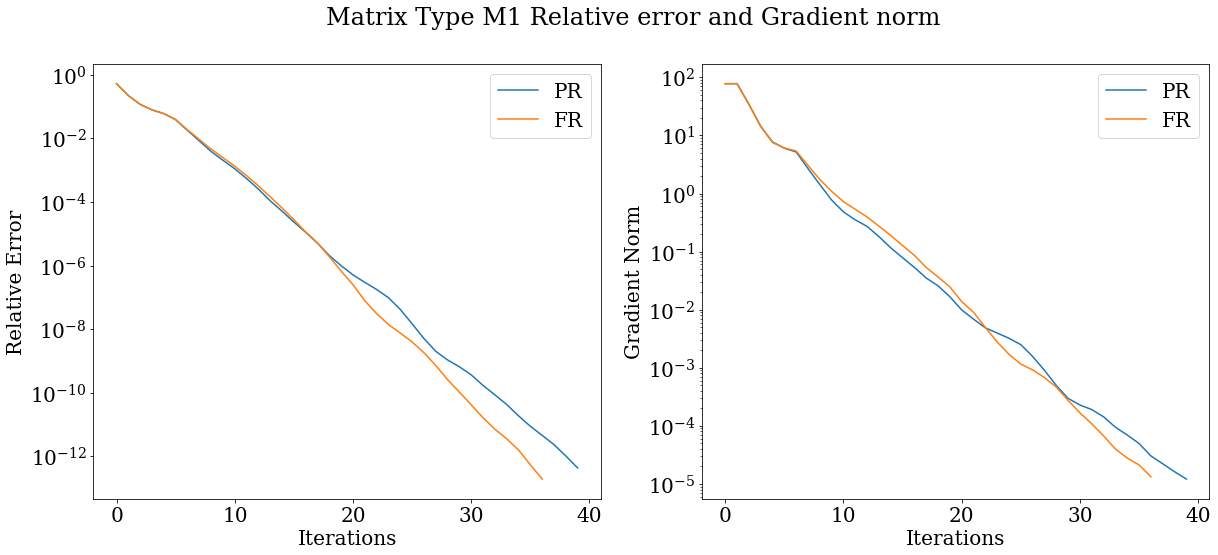

In [35]:
make_plot1(gradientsCG_PR, gradientsCG_FR,
              errorsCG_PR, errorsCG_FR,
              type = 'M1', experiment_name='CG-M1')

# Experiments on Matrix M1 With gradient descent

In [13]:
import src.gd as GD

In [14]:
def make_plot(normsGradient_PR, normsGradient_GD, normsGradient_FR,
              relativeErrors_PR, relativeErrors_GD, relativeErrors_FR,
              type = 'M1', experiment_name='M'):
    
    font = {'family': 'serif',         
        'weight': 'normal',
        'size': 20}
    
    plt.rc('font', **font)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    
    fig.suptitle(
            'Matrix Type ' + type + ' Relative error and Gradient norm')
    
    
    x = list(range(len(relativeErrors_PR)))
    axs[0].plot(x, relativeErrors_PR, label = "PR")
    axs[1].plot(x, normsGradient_PR, label = 'PR')
    

    x = list(range(len(relativeErrors_GD)))
    axs[0].plot(x, relativeErrors_GD, label = 'GD')
    axs[1].plot(x, normsGradient_GD, label = 'GD')
    

    x = list(range(len(relativeErrors_FR)))
    axs[0].plot(x, relativeErrors_FR, label = 'FR')
    axs[1].plot(x, normsGradient_FR, label = 'FR')
        
    axs[0].legend()
    axs[1].legend()
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Gradient Norm")
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Relative Error")
    
    plot_path = 'plot/'
    plt.savefig(plot_path + experiment_name + '.png')

In [15]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsSGD = []
gradientsSGD = []

In [16]:
f = nf.Norm(M1)
x0 = generate_starting_point(f.dim)
norm = la.norm(M1, ord=2) ** 2

In [17]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-6, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 772.4216, ||gradient(f(x))|| = 1044.623407, alpha=0.0969, rate=0.0000
iteration 2, f(x) = 865.2216, ||gradient(f(x))|| = 293.929810, alpha=0.2222, rate=0.4495
iteration 3, f(x) = 924.5038, ||gradient(f(x))|| = 89.218497, alpha=0.5086, rate=0.6146
iteration 4, f(x) = 958.3919, ||gradient(f(x))|| = 35.004131, alpha=0.9443, rate=0.5994
iteration 5, f(x) = 980.7338, ||gradient(f(x))|| = 14.020344, alpha=1.5764, rate=0.6180
iteration 6, f(x) = 995.2345, ||gradient(f(x))|| = 4.513057, alpha=2.5136, rate=0.5925
iteration 7, f(x) = 1002.7465, ||gradient(f(x))|| = 1.879521, alpha=3.8593, rate=0.5536
iteration 8, f(x) = 1007.6873, ||gradient(f(x))|| = 0.970549, alpha=6.0240, rate=0.5823
iteration 9, f(x) = 1010.8384, ||gradient(f(x))|| = 0.344118, alpha=7.3012, rate=0.5282
iteration 10, f(x) = 1012.0492, ||gradient(f(x))|| = 0.112906, alpha=7.4943, rate=0.4304
iteration 11, f(x) = 1012.6405, ||gradient(f(x))|| = 0.062682, alpha=10.9064, rate=0.4914
iteration 12, f(x) 

FR beta

In [18]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-6, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 772.4216, ||gradient(f(x))|| = 1044.623407, alpha=0.0969, rate=0.0000
iteration 2, f(x) = 865.2216, ||gradient(f(x))|| = 293.929810, alpha=0.2222, rate=0.4495
iteration 3, f(x) = 924.7933, ||gradient(f(x))|| = 85.556732, alpha=0.5184, rate=0.6146
iteration 4, f(x) = 957.6394, ||gradient(f(x))|| = 37.496428, alpha=0.9229, rate=0.5975
iteration 5, f(x) = 980.0532, ||gradient(f(x))|| = 16.347525, alpha=1.4138, rate=0.6285
iteration 6, f(x) = 994.2160, ||gradient(f(x))|| = 6.371500, alpha=1.9802, rate=0.5967
iteration 7, f(x) = 1001.8295, ||gradient(f(x))|| = 3.030136, alpha=2.6082, rate=0.5730
iteration 8, f(x) = 1006.9568, ||gradient(f(x))|| = 1.799190, alpha=3.6414, rate=0.5993
iteration 9, f(x) = 1010.3185, ||gradient(f(x))|| = 0.798076, alpha=3.9730, rate=0.5498
iteration 10, f(x) = 1011.7787, ||gradient(f(x))|| = 0.297208, alpha=3.7807, rate=0.4632
iteration 11, f(x) = 1012.4714, ||gradient(f(x))|| = 0.170525, alpha=4.7469, rate=0.4966
iteration 12, f(x) =

gradient descent

In [19]:
optimizerSGD = GD.GradientDescent(f, x0, 1e-6, fstar = norm, verbose = True)
gradientsSGD, normsSGD, errorsSGD = optimizerSGD.run(500)

[start]
iteration 0, f(x) = 772.4216, ||gradient(f(x))|| = 32.320634, alpha=0.0969, rate=0.0000
iteration 1, f(x) = 859.3181, ||gradient(f(x))|| = 23.470421, alpha=0.1664, rate=0.4495
iteration 2, f(x) = 903.7884, ||gradient(f(x))|| = 17.902721, alpha=0.1615, rate=0.6391
iteration 3, f(x) = 932.9225, ||gradient(f(x))|| = 15.176700, alpha=0.1818, rate=0.7110
iteration 4, f(x) = 953.1637, ||gradient(f(x))|| = 12.402637, alpha=0.1758, rate=0.7338
iteration 5, f(x) = 967.9127, ||gradient(f(x))|| = 10.934989, alpha=0.1918, rate=0.7479
iteration 6, f(x) = 978.7844, ||gradient(f(x))|| = 9.077315, alpha=0.1818, rate=0.7544
iteration 7, f(x) = 986.8437, ||gradient(f(x))|| = 8.049372, alpha=0.1956, rate=0.7600
iteration 8, f(x) = 992.8352, ||gradient(f(x))|| = 6.735591, alpha=0.1849, rate=0.7660
iteration 9, f(x) = 997.3327, ||gradient(f(x))|| = 6.036290, alpha=0.1983, rate=0.7728
iteration 10, f(x) = 1000.7432, ||gradient(f(x))|| = 5.114400, alpha=0.1872, rate=0.7794
iteration 11, f(x) = 1003.3

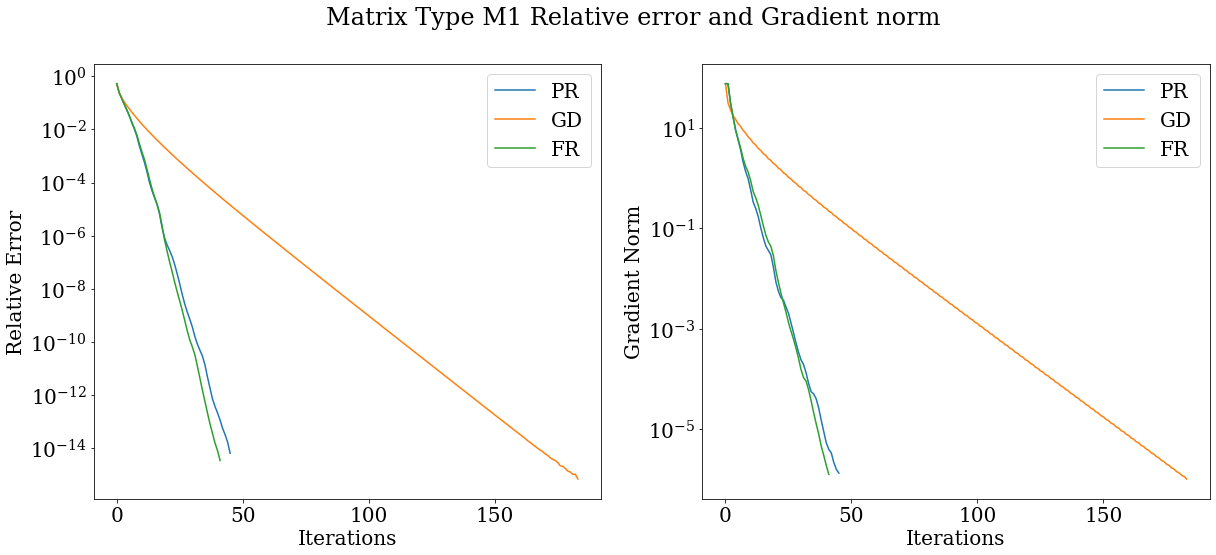

In [20]:
make_plot(gradientsCG_PR, gradientsSGD, gradientsCG_FR,
              errorsCG_PR, errorsSGD, errorsCG_FR,
              type = 'M1', experiment_name='CG-GD-M1')

# Experiments on Matrix M2

In [21]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []

In [57]:
f = nf.Norm(M2)
x0 = generate_starting_point(f.dim)
norm = la.norm(M2, ord=2) ** 2

In [58]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2297.5416, ||gradient(f(x))|| = 6018.155331, alpha=0.0181, rate=0.0000
iteration 2, f(x) = 2398.3371, ||gradient(f(x))|| = 1955.949808, alpha=0.0401, rate=0.5953
iteration 3, f(x) = 2457.4896, ||gradient(f(x))|| = 878.791344, alpha=0.0729, rate=0.7080
iteration 4, f(x) = 2523.5355, ||gradient(f(x))|| = 413.745845, alpha=0.2167, rate=0.7580
iteration 5, f(x) = 2572.8656, ||gradient(f(x))|| = 113.519985, alpha=0.3360, rate=0.6435
iteration 6, f(x) = 2601.9931, ||gradient(f(x))|| = 33.262487, alpha=0.6471, rate=0.5862
iteration 7, f(x) = 2619.8777, ||gradient(f(x))|| = 13.713783, alpha=1.3191, rate=0.5831
iteration 8, f(x) = 2630.7093, ||gradient(f(x))|| = 4.327724, alpha=1.8832, rate=0.5611
iteration 9, f(x) = 2635.7303, ||gradient(f(x))|| = 1.655259, alpha=2.6153, rate=0.5262
iteration 10, f(x) = 2638.3197, ||gradient(f(x))|| = 0.789484, alpha=3.4059, rate=0.5826
iteration 11, f(x) = 2640.2488, ||gradient(f(x))|| = 0.619946, alpha=5.3059, rate=0.6305
iteratio

FR beta

In [59]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2297.5416, ||gradient(f(x))|| = 6018.155331, alpha=0.0181, rate=0.0000
iteration 2, f(x) = 2398.3371, ||gradient(f(x))|| = 1955.949808, alpha=0.0401, rate=0.5953
iteration 3, f(x) = 2457.8918, ||gradient(f(x))|| = 833.525124, alpha=0.0750, rate=0.7080
iteration 4, f(x) = 2522.6908, ||gradient(f(x))|| = 436.813544, alpha=0.2179, rate=0.7563
iteration 5, f(x) = 2571.7553, ||gradient(f(x))|| = 130.201896, alpha=0.2997, rate=0.6494
iteration 6, f(x) = 2599.7990, ||gradient(f(x))|| = 48.165816, alpha=0.5042, rate=0.5913
iteration 7, f(x) = 2617.8064, ||gradient(f(x))|| = 24.671314, alpha=0.8405, rate=0.6049
iteration 8, f(x) = 2629.2579, ||gradient(f(x))|| = 9.650232, alpha=1.0201, rate=0.5806
iteration 9, f(x) = 2634.6372, ||gradient(f(x))|| = 4.425235, alpha=1.1775, rate=0.5407
iteration 10, f(x) = 2637.7439, ||gradient(f(x))|| = 2.340060, alpha=1.4595, rate=0.6009
iteration 11, f(x) = 2639.6901, ||gradient(f(x))|| = 1.684701, alpha=1.7144, rate=0.6165
iteratio

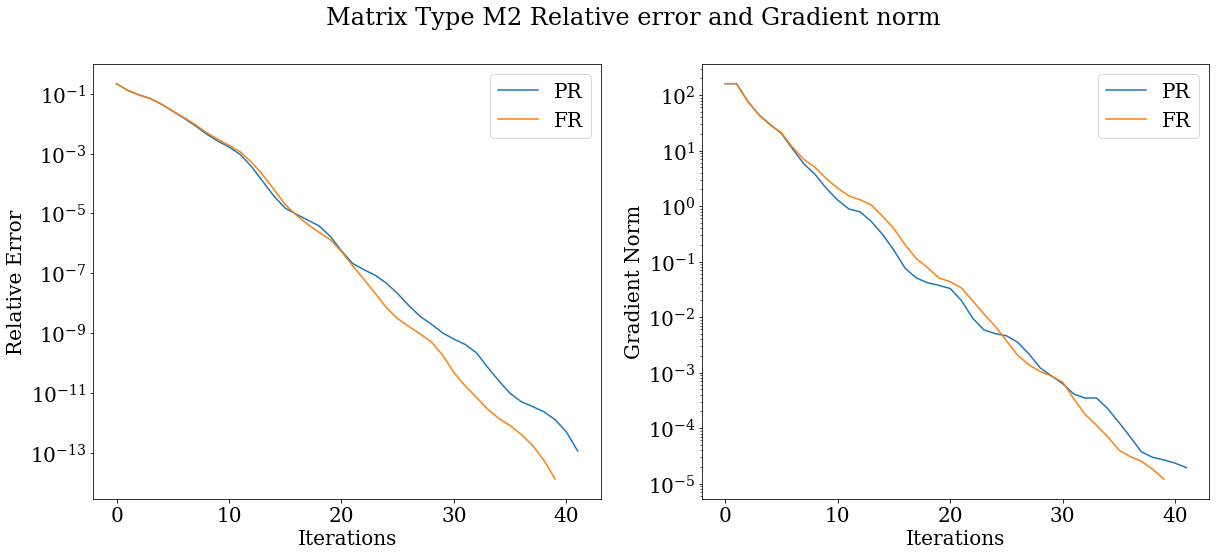

In [60]:
make_plot1(gradientsCG_PR, gradientsCG_FR,
              errorsCG_PR, errorsCG_FR,
              type = 'M2', experiment_name='CG-M2')

# Experiments on Matrix M3

In [61]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []

In [62]:
f = nf.Norm(M3)
x0 = generate_starting_point(f.dim)
norm = la.norm(M3, ord=2) ** 2

In [63]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 614.8354, ||gradient(f(x))|| = 469.633120, alpha=0.0891, rate=0.0000
iteration 2, f(x) = 651.1289, ||gradient(f(x))|| = 139.276101, alpha=0.1930, rate=0.4268
iteration 3, f(x) = 669.4330, ||gradient(f(x))|| = 26.714482, alpha=0.3114, rate=0.4186
iteration 4, f(x) = 674.5070, ||gradient(f(x))|| = 7.151572, alpha=0.4111, rate=0.2994
iteration 5, f(x) = 676.2621, ||gradient(f(x))|| = 1.882218, alpha=0.5127, rate=0.3514
iteration 6, f(x) = 676.8285, ||gradient(f(x))|| = 0.756961, alpha=0.6149, rate=0.3616
iteration 7, f(x) = 677.1239, ||gradient(f(x))|| = 0.341409, alpha=0.7926, rate=0.4304
iteration 8, f(x) = 677.2169, ||gradient(f(x))|| = 0.059854, alpha=0.5479, rate=0.3096
iteration 9, f(x) = 677.2343, ||gradient(f(x))|| = 0.020837, alpha=0.5822, rate=0.2986
iteration 10, f(x) = 677.2433, ||gradient(f(x))|| = 0.015056, alpha=0.8687, rate=0.5603
iteration 11, f(x) = 677.2497, ||gradient(f(x))|| = 0.008730, alpha=0.8528, rate=0.5920
iteration 12, f(x) = 677.253

FR beta

In [64]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 614.8354, ||gradient(f(x))|| = 469.633120, alpha=0.0891, rate=0.0000
iteration 2, f(x) = 651.1289, ||gradient(f(x))|| = 139.276101, alpha=0.1930, rate=0.4268
iteration 3, f(x) = 669.5856, ||gradient(f(x))|| = 24.914410, alpha=0.3204, rate=0.4186
iteration 4, f(x) = 674.4216, ||gradient(f(x))|| = 7.209085, alpha=0.4140, rate=0.2936
iteration 5, f(x) = 676.2104, ||gradient(f(x))|| = 2.115738, alpha=0.5130, rate=0.3696
iteration 6, f(x) = 676.8001, ||gradient(f(x))|| = 0.828596, alpha=0.5661, rate=0.3690
iteration 7, f(x) = 677.1037, ||gradient(f(x))|| = 0.400534, alpha=0.7409, rate=0.4363
iteration 8, f(x) = 677.2123, ||gradient(f(x))|| = 0.076465, alpha=0.5450, rate=0.3345
iteration 9, f(x) = 677.2328, ||gradient(f(x))|| = 0.024634, alpha=0.5370, rate=0.2889
iteration 10, f(x) = 677.2424, ||gradient(f(x))|| = 0.016146, alpha=0.7775, rate=0.5350
iteration 11, f(x) = 677.2488, ||gradient(f(x))|| = 0.009696, alpha=0.7911, rate=0.5944
iteration 12, f(x) = 677.252

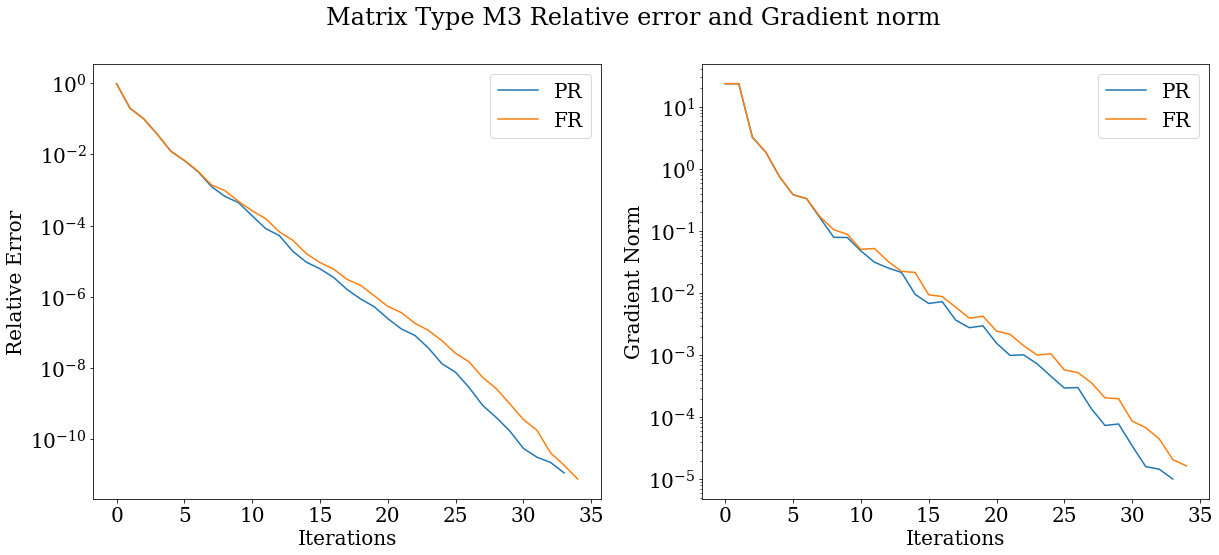

In [111]:
make_plot1(gradientsCG_PR, gradientsCG_FR,
              errorsCG_PR, errorsCG_FR,
              type = 'M3', experiment_name='CG-M3')

# Experiments on Matrix M4

In [106]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []

In [107]:
f = nf.Norm(M4)
x0 = generate_starting_point(f.dim)
norm = la.norm(M4, ord=2) ** 2

In [108]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2122.1976, ||gradient(f(x))|| = 10.527606, alpha=7.4981, rate=0.0000
iteration 2, f(x) = 2381.2429, ||gradient(f(x))|| = 3.390878, alpha=56.0583, rate=0.2028
iteration 3, f(x) = 2551.2470, ||gradient(f(x))|| = 0.561800, alpha=142.2864, rate=0.5097
iteration 4, f(x) = 2617.5250, ||gradient(f(x))|| = 0.147363, alpha=276.9316, rate=0.3687
iteration 5, f(x) = 2632.6228, ||gradient(f(x))|| = 0.109656, alpha=217.4392, rate=0.3324
iteration 6, f(x) = 2641.7179, ||gradient(f(x))|| = 0.025938, alpha=173.9388, rate=0.5424
iteration 7, f(x) = 2647.1983, ||gradient(f(x))|| = 0.006263, alpha=441.0306, rate=0.4918
iteration 8, f(x) = 2648.7742, ||gradient(f(x))|| = 0.006172, alpha=513.1757, rate=0.3772
iteration 9, f(x) = 2649.3469, ||gradient(f(x))|| = 0.002285, alpha=187.2194, rate=0.5253
iteration 10, f(x) = 2650.0180, ||gradient(f(x))|| = 0.000986, alpha=594.4671, rate=0.6715
iteration 11, f(x) = 2650.3006, ||gradient(f(x))|| = 0.000647, alpha=576.6792, rate=0.4268
it

FR beta

In [109]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 2122.1976, ||gradient(f(x))|| = 10.527606, alpha=7.4981, rate=0.0000
iteration 2, f(x) = 2381.2429, ||gradient(f(x))|| = 3.390878, alpha=56.0583, rate=0.2028
iteration 3, f(x) = 2551.2471, ||gradient(f(x))|| = 0.561527, alpha=142.3153, rate=0.5097
iteration 4, f(x) = 2617.5053, ||gradient(f(x))|| = 0.147579, alpha=276.8077, rate=0.3687
iteration 5, f(x) = 2632.3992, ||gradient(f(x))|| = 0.110086, alpha=212.2483, rate=0.3325
iteration 6, f(x) = 2641.4126, ||gradient(f(x))|| = 0.028390, alpha=170.3595, rate=0.5488
iteration 7, f(x) = 2646.8130, ||gradient(f(x))|| = 0.011028, alpha=391.9799, rate=0.5025
iteration 8, f(x) = 2647.9855, ||gradient(f(x))|| = 0.007837, alpha=214.5364, rate=0.4069
iteration 9, f(x) = 2649.2517, ||gradient(f(x))|| = 0.002560, alpha=326.7676, rate=0.6835
iteration 10, f(x) = 2649.8248, ||gradient(f(x))|| = 0.002740, alpha=450.7271, rate=0.5000
iteration 11, f(x) = 2650.1040, ||gradient(f(x))|| = 0.001053, alpha=204.5625, rate=0.5473
it

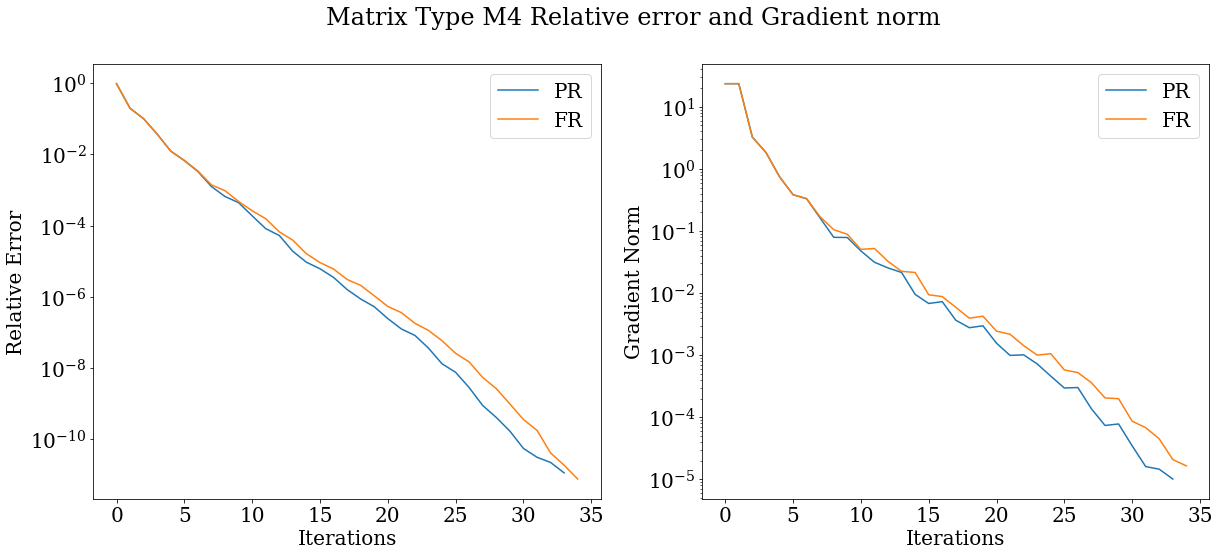

In [110]:
make_plot1(gradientsCG_PR, gradientsCG_FR,
              errorsCG_PR, errorsCG_FR,
              type = 'M4', experiment_name='CG-M4')

# Experiments on Matrix M5

In [71]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []

In [72]:
f = nf.Norm(M5)
x0 = generate_starting_point(f.dim)
norm = la.norm(M5, ord=2) ** 2

In [73]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='PR', verbose = True)
gradientsCG_PR, normsCG, errorsCG_PR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 61176.1355, ||gradient(f(x))|| = 72616.958657, alpha=0.2203, rate=0.0000
iteration 2, f(x) = 80228.0730, ||gradient(f(x))|| = 10392.457840, alpha=0.7635, rate=0.3923
iteration 3, f(x) = 88154.2485, ||gradient(f(x))|| = 3401.311701, alpha=1.8440, rate=0.5093
iteration 4, f(x) = 93187.8657, ||gradient(f(x))|| = 900.972975, alpha=3.6833, rate=0.5991
iteration 5, f(x) = 95500.9151, ||gradient(f(x))|| = 423.483107, alpha=6.0382, rate=0.5751
iteration 6, f(x) = 97312.2647, ||gradient(f(x))|| = 150.253259, alpha=10.3056, rate=0.6605
iteration 7, f(x) = 98078.3498, ||gradient(f(x))|| = 43.431985, alpha=11.4751, rate=0.5974
iteration 8, f(x) = 98406.5464, ||gradient(f(x))|| = 17.723551, alpha=16.2553, rate=0.7150
iteration 9, f(x) = 98611.4882, ||gradient(f(x))|| = 13.492952, alpha=24.6043, rate=0.8292
iteration 10, f(x) = 98799.5130, ||gradient(f(x))|| = 13.685359, alpha=29.9734, rate=0.8714
iteration 11, f(x) = 99137.5062, ||gradient(f(x))|| = 17.723007, alpha=58.6

FR beta

In [74]:
optimizerCG = CG.conjugateGradient(f, x0, 1e-5, norm, method='FR', verbose = True)
gradientsCG_FR, normsCG, errorsCG_FR = optimizerCG.run(500)

[start]
iteration 1, f(x) = 61176.1355, ||gradient(f(x))|| = 72616.958657, alpha=0.2203, rate=0.0000
iteration 2, f(x) = 80228.0730, ||gradient(f(x))|| = 10392.457840, alpha=0.7635, rate=0.3923
iteration 3, f(x) = 88156.4389, ||gradient(f(x))|| = 3394.150845, alpha=1.8459, rate=0.5093
iteration 4, f(x) = 93108.3274, ||gradient(f(x))|| = 994.548319, alpha=3.5401, rate=0.5990
iteration 5, f(x) = 95387.1947, ||gradient(f(x))|| = 491.525805, alpha=5.1851, rate=0.5819
iteration 6, f(x) = 97230.1466, ||gradient(f(x))|| = 205.629362, alpha=8.6104, rate=0.6693
iteration 7, f(x) = 98006.7701, ||gradient(f(x))|| = 66.283029, alpha=8.1549, rate=0.6005
iteration 8, f(x) = 98362.0168, ||gradient(f(x))|| = 31.103795, alpha=11.1808, rate=0.7196
iteration 9, f(x) = 98575.3243, ||gradient(f(x))|| = 21.948531, alpha=14.1598, rate=0.8218
iteration 10, f(x) = 98766.0945, ||gradient(f(x))|| = 21.564873, alpha=18.0403, rate=0.8698
iteration 11, f(x) = 99039.7300, ||gradient(f(x))|| = 32.751191, alpha=27.290

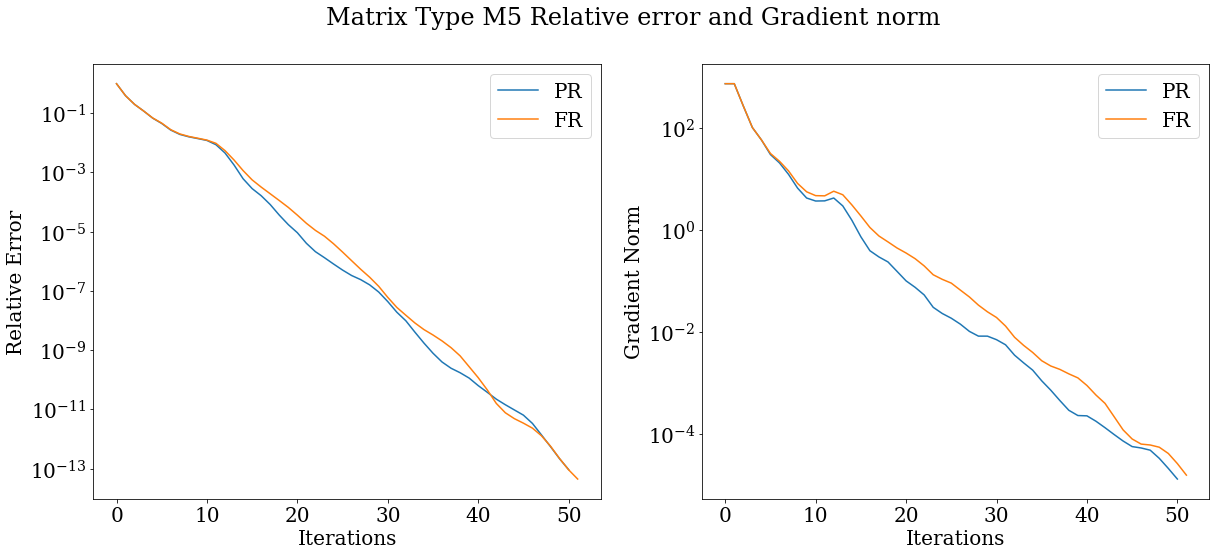

In [75]:
make_plot1(gradientsCG_PR, gradientsCG_FR,
              errorsCG_PR, errorsCG_FR,
              type = 'M5', experiment_name='CG-M5')